## Demo for learning dual channel PSF from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='M2')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\190910_u2os_course_96_WGA_3D_M2\01_191009_u2os_course_96_WGA_3D_ritu_1/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Pos0.' # keyword of the file name or the full file name without extension
L.param.gain = 0.1
L.param.ccd_offset = 400
L.param.option.insitu.stage_pos = 0.5 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'insitu_zernike', 'insitu_pupil'` | `'insitu_zernike'`
$\small\color{skyblue}{\mathrm{const\_pupilmag}}$ | `True`, `False` | `False`
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

$\small\color{skyblue}{\mathrm{init\_pupil\_file}}$ :  Full path to the .h5 file from bead PSF learning, Make sure the bead PSF varies in the correct axial direction, this usually requires setting the parameter $\small\color{skyblue}{\mathrm{stage\_mov\_dir}}$ to `'reverse'` during bead PSF learning

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:\EMBL files\data for PSF learning\190910_u2os_course_96_WGA_3D_M2\01_191009_u2os_course_96_WGA_3D_ritu_1\01_191009_u2os_course_96_WGA_3D_ritu_1_MMStack_Pos0.ome.tif
(2, 2000, 234, 256)
rois shape channel 0: (20543, 21, 21)
rois shape channel 1: (12732, 21, 21)
rois shape channel 0: (6974, 21, 21)
rois shape channel 1: (6974, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.46s/it total time: 1.45s
5/6: localization: 4/4 [00:00s] 13.04it/s total time: 1.76s
3/6: learning: 53/100 [00:15s]  3.40it/s, current loss: 1.48336, total time: 15.58s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.46s/it total time: 17.03s
5/6: localization: 4/4 [00:00s] 14.57it/s total time: 17.30s
3/6: learning: 53/100 [00:15s]  3.42it/s, current loss: 0.84476, total time: 31.09s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.93s
5/6: localization: 4/4 [00:07s]  1.96s/it total time: 10.78s
3/6: learning: 199/250 [00:42s]  4.71it/s, current loss: 2.17807, total time: 73.36s


outlier percentage: 0.23735725938009788
rois shape channel 0: (935, 21, 21)
rois shape channel 1: (935, 21, 21)


3/6: learning: 85/250 [00:16s]  5.04it/s, current loss: 2.04462, total time: 90.22s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.93s
5/6: localization: 4/4 [00:03s]  1.25it/s total time: 6.13s
6/6: saving results: [00:00s] total time: 6.38s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.47s/it total time: 1.46s
5/6: localization: 4/4 [00:00s]  6.70it/s total time: 2.06s
3/6: learning: 54/100 [00:15s]  3.40it/s, current loss: 1.48737, total time: 15.89s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.52s/it total time: 17.40s
5/6: localization: 4/4 [00:00s] 15.35it/s total time: 17.66s
3/6: learning: 53/100 [00:15s]  3.33it/s, current loss: 0.84453, total time: 31.81s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.92s
5/6: localization: 4/4 [00:07s]  1.84s/it total time: 10.28s
3/6: learning: 182/250 [00:37s]  4.81it/s, current loss: 2.16026, total time: 69.67s


outlier percentage: 0.23668122270742353
rois shape channel 0: (874, 21, 21)
rois shape channel 1: (874, 21, 21)


3/6: learning: 145/250 [00:28s]  5.11it/s, current loss: 2.03417, total time: 98.03s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.93s
5/6: localization: 4/4 [00:03s]  1.27it/s total time: 6.08s
6/6: saving results: [00:00s] total time: 6.29s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


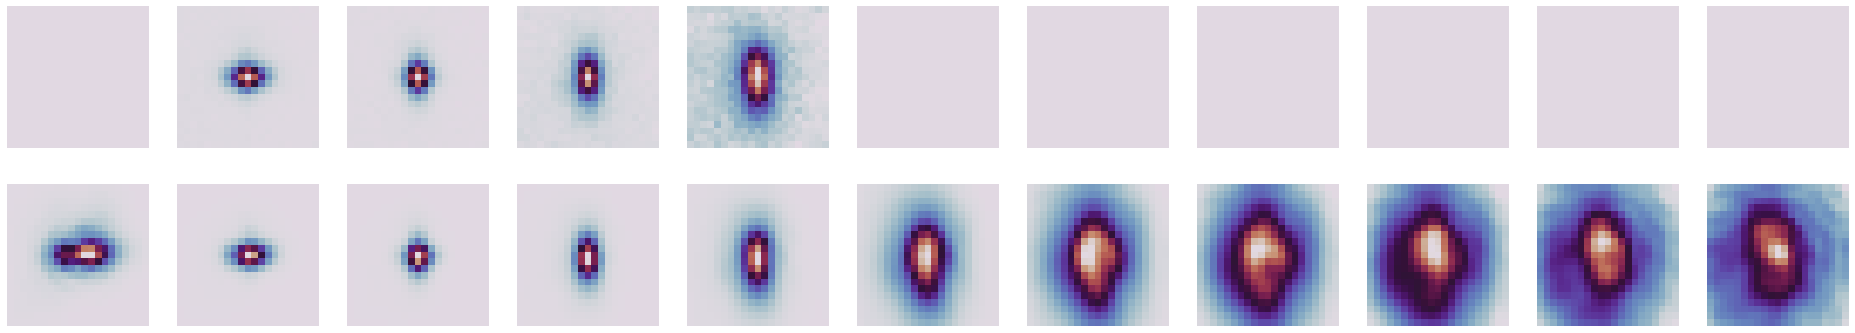

channel 1


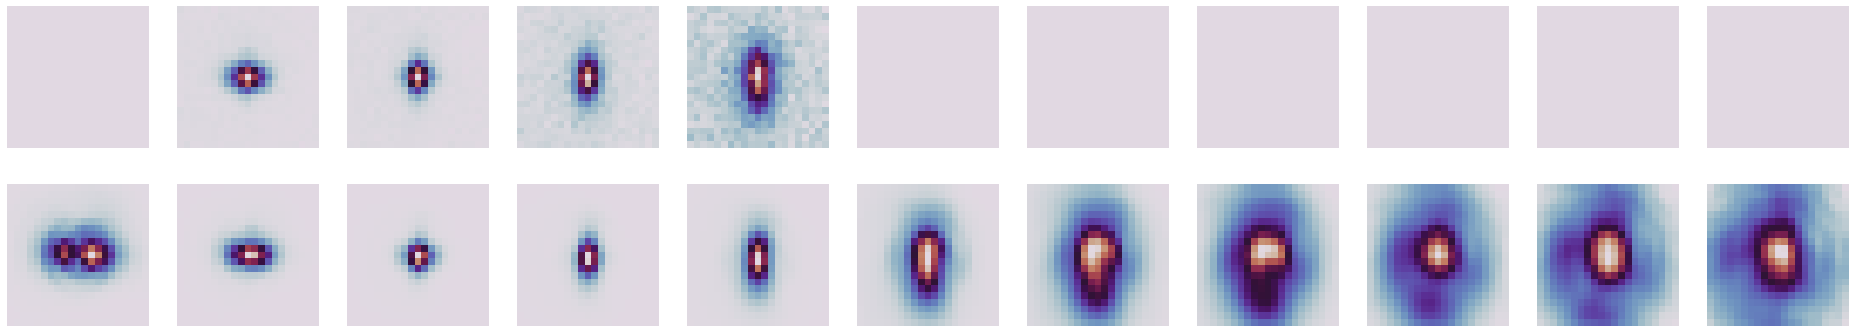

In [6]:
showpsfvsdata_insitu(f,p)

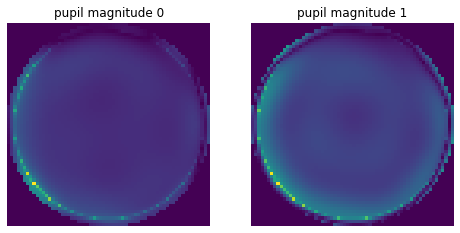

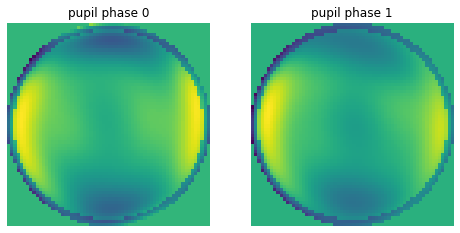

In [7]:
showpupil(f,p)

##### Optional plots

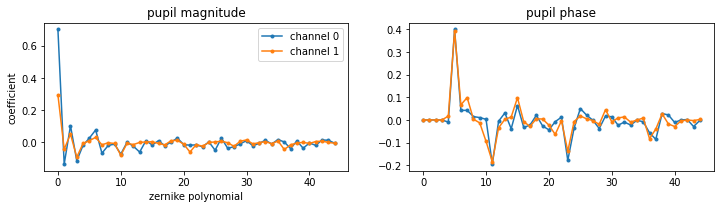

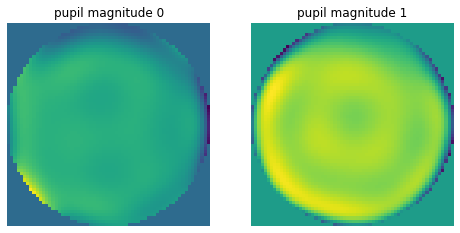

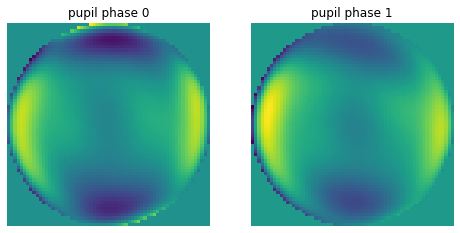

In [8]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[ 0.9988 -0.0501 -0.    ]
 [ 0.0502  0.9974  0.    ]
 [-2.6571  4.0411  1.    ]]


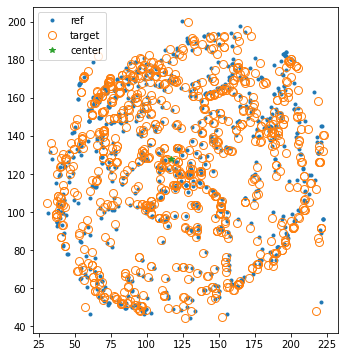

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

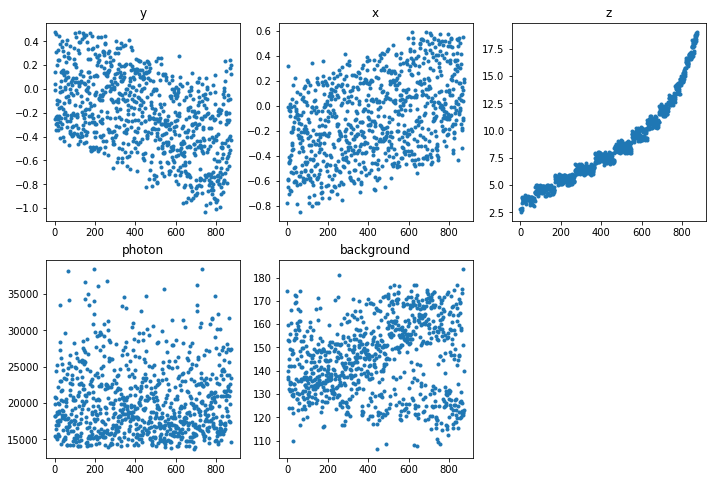

In [10]:
showlearnedparam_insitu(f,p)